Apply Model to some inputs Learn how:

Load a saved Model
Select inputs
Apply Model to inputs (Predict)

Import packages

In [1]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

Some verifications

Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [3]:
#use numpy reshape
x_train = np.reshape(X_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(X_valid, (10000, 28 * 28)).astype('float32')

Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [4]:
#print(x_train)
x_train /=  255
x_valid /=  255

Load Model

In [6]:
from tensorflow.keras.models import load_model

#load Model
folder = "logs/crossEntropyReLu2Layers/20200229-202752/"
model = load_model(folder + 'model_all.h5')


Select some inputs

In [7]:
#print(x_train[0])
size = 100
indexes = np.random.randint(0, y_valid.size-1, size=size)
tf.print("indexes:", indexes)
x = np.array([x_valid[i] for i in indexes])
X = np.array([X_valid[i] for i in indexes])
y = np.array([y_valid[i] for i in indexes])
tf.print(x.shape)
tf.print(y.shape)
# x = np.array([x_train[0], x_train[1], x_train[4566]])
# y = np.array([y_train[0], y_train[1], y_train[4566]])


indexes: array([3262, 9231, 4382, 9601, 2269, 9969, 9113,  780, 6958, 2264, 9233,
       7002, 2076, 7455, 4000, 7528, 9791, 5948, 1917,  858, 6578, 5153,
       1157, 2807, 4896,  803, 9402, 9674, 1131, 2278, 7748, 3908, 7950,
        848,  262,  997, 9727, 4007, 7241, 9450, 1885, 3888, 2091, 1268,
       3720, 4273,  331, 4166, 8555, 6163, 9746,   57,  210, 4859, 9034,
       8606,  888, 7208, 1587, 2478, 5450,  483,  999, 1753, 9362, 3076,
       9810, 7995, 7364, 8578, 3130, 2142, 8084, 6559, 8998, 7327, 4058,
       3716, 5181,  461, 2471, 6562, 8854,  800, 4816, 7382, 6525, 1812,
       8019, 4785,  870, 5792, 8879, 6000, 6594, 2700, 2678, 7209, 2668,
       8746])
(100, 784)
(100,)


Predict

In [8]:
 
#predict
y_predicted = model.predict_classes(x)


Print Prediction results

In [63]:
#print prediction results
#tf.print("y:", y)
#tf.print("predicted classes", y_predicted)

In [9]:
#check if prediction is valid
comparison = y == y_predicted
equal_arrays = comparison.all()

#prints True if All is OK
print(equal_arrays)

#print not predicted indexes
diff = y - y_predicted
 
indexes_false = np.array([i for i in np.arange(diff.size) if diff[i] != 0])
print("Not predicted indexes:", indexes_false)
print("Not predicted y:", [y[i] for i in indexes_false])
print("Not predicted y_predicted:", [y_predicted[i] for i in indexes_false])

False
Not predicted indexes: [28 37]
Not predicted y: [5, 7]
Not predicted y_predicted: [4, 4]


In [10]:
#Accuracy
acc =  1- indexes_false.size/size
print("Accuracy = ", acc)

Accuracy =  0.98


In [11]:
 
np.array(indexes_false)

array([28, 37])

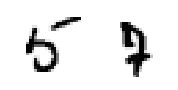

In [12]:
plt.figure(figsize=(5,5))
for k in  np.arange(np.array(indexes_false).size):
    plt.subplot(3, 4, k+1)
    plt.imshow(X[indexes_false[k]], cmap="Greys")
    plt.axis('off')
plt.tight_layout()
plt.show()

End